In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter 
pd.set_option('display.max_columns', 50)

In [2]:
df= pd.read_csv("moviereviews.csv")

In [3]:
df.head(20)

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
5,neg,"to put it bluntly , ed wood would have been pr..."
6,neg,"synopsis : melissa , a mentally-disturbed woma..."
7,neg,tim robbins and martin lawernce team up in thi...
8,neg,"in "" gia "" , angelina jolie plays the titular ..."
9,neg,"in 1990 , the surprise success an unheralded l..."


In [4]:
df.shape

(2000, 2)

In [5]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
df["label"].value_counts()

neg    1000
pos    1000
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

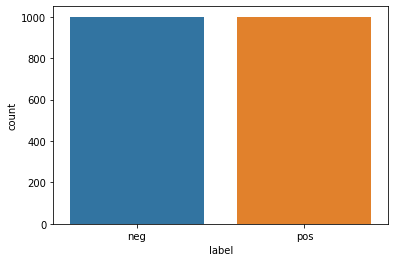

In [7]:
sns.countplot(data =df, x = "label")

In [8]:
df= df.dropna()

In [9]:
df.shape

(1965, 2)

In [10]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [11]:
df["review"]

0       how do films like mouse hunt get into theatres...
1       some talented actresses are blessed with a dem...
2       this has been an extraordinary year for austra...
3       according to hollywood movies made in last few...
4       my first press screening of 1998 and already i...
                              ...                        
1995    i like movies with albert brooks , and i reall...
1996    it might surprise some to know that joel and e...
1997    the verdict : spine-chilling drama from horror...
1998    i want to correct what i wrote in a former ret...
1999    a couple of months ago , when i first download...
Name: review, Length: 1965, dtype: object

In [12]:
df["review"].str.isspace()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 1965, dtype: bool

In [13]:
df[df["review"].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [14]:
df = df[~df['review'].str.isspace()]

In [15]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [17]:
df.describe().T

,count,unique,top,freq
label,1938,2,neg,969
review,1938,1938,how do films like mouse hunt get into theatres...,1


In [18]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

# CLEANING DATA

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
stop_words = stopwords.words('english')

In [22]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [23]:
df["review"] = df["review"].apply(cleaning)
df["review"]

0       film like mouse hunt get theatre isnt law some...
1       talented actress blessed demonstrated wide act...
2       extraordinary year australian film shine scoop...
3       according hollywood movie made last decade lif...
4       first press screening already ive gotten prime...
                              ...                        
1995    like movie albert brook really like movie dire...
1996    might surprise know joel ethan coen brought un...
1997    verdict drama horror maestro stephen king feat...
1998    want correct wrote former retrospective david ...
1999    couple month ago first downloaded trailer net ...
Name: review, Length: 1938, dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer(stop_words='english')

In [26]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 30 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:30])

Top 30 words used for Negative reviews.
[('film', 4650), ('movie', 3595), ('like', 1806), ('character', 1752), ('time', 1309), ('scene', 1225), ('make', 1196), ('good', 1091), ('bad', 984), ('story', 960), ('plot', 880), ('thing', 818), ('way', 802), ('really', 743), ('know', 726), ('little', 692), ('look', 691), ('come', 688), ('year', 654), ('doesnt', 644), ('end', 635), ('dont', 633), ('people', 630), ('action', 629), ('director', 616), ('work', 608), ('actor', 602), ('life', 598), ('man', 584), ('play', 556)]


In [27]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 30 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:30])

Top 30 words used for Positive reviews.
[('film', 5806), ('movie', 2961), ('character', 1983), ('like', 1677), ('time', 1418), ('make', 1291), ('story', 1280), ('scene', 1267), ('life', 1159), ('good', 1145), ('way', 959), ('year', 841), ('performance', 792), ('people', 775), ('best', 768), ('come', 761), ('thing', 755), ('little', 749), ('really', 729), ('work', 720), ('man', 705), ('new', 698), ('great', 686), ('know', 675), ('love', 674), ('world', 645), ('role', 617), ('end', 613), ('play', 605), ('actor', 587)]


# TRAINING AND DATA

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df['review']
y = df['label']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [33]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [34]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,aa,aaa,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaaahhhs,aahs,aaliyah,aaliyahs,aalyah,aalyahs,aamir,aardman,aaron,aatish,ab,aback,abandon,abandoned,abandoning,abandonment,abating,abba,abbe,abberation,...,zone,zoo,zookeeper,zookeepers,zoolander,zoolanders,zoologist,zoom,zooming,zoot,zophres,zorg,zorro,zsigmond,zucker,zuehlke,zuko,zukovsky,zulu,zurgs,zweibel,zwick,zwicks,zwigoffs,zycie
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [36]:
def eval(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test, y_test)

# NAIVE BAYES

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
nb = MultinomialNB()
nb.fit(X_train_count,y_train)

MultinomialNB()

NB MODEL
              precision    recall  f1-score   support

         neg       0.78      0.84      0.81       191
         pos       0.84      0.77      0.80       197

    accuracy                           0.81       388
   macro avg       0.81      0.81      0.81       388
weighted avg       0.81      0.81      0.81       388



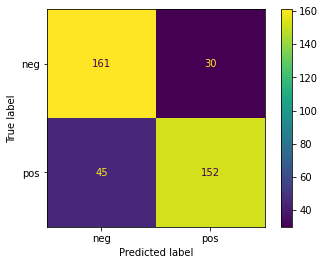

In [39]:
print("NB MODEL")
eval(nb, X_test_count)

# LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(max_iter=1000)

LOG MODEL
              precision    recall  f1-score   support

         neg       0.79      0.87      0.83       191
         pos       0.86      0.77      0.81       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



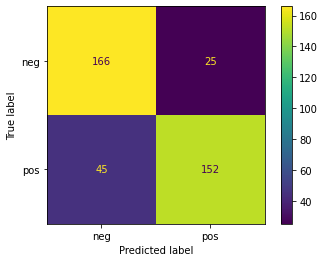

In [41]:
print("LOG MODEL")
eval(log, X_test_count)

# SVM

In [42]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.2)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.2)

SVC MODEL
              precision    recall  f1-score   support

         neg       0.80      0.87      0.83       191
         pos       0.86      0.79      0.82       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



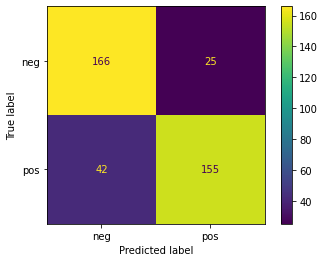

In [43]:
print("SVC MODEL")
eval(svc, X_test_count)

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=8)

KNN MODEL
              precision    recall  f1-score   support

         neg       0.52      0.94      0.67       191
         pos       0.72      0.15      0.24       197

    accuracy                           0.54       388
   macro avg       0.62      0.54      0.46       388
weighted avg       0.62      0.54      0.45       388



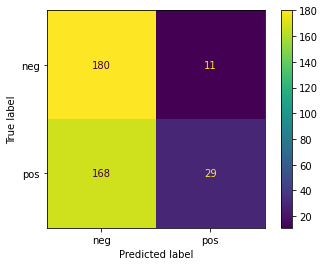

In [45]:
print("KNN MODEL")
eval(knn, X_test_count)

# RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

RF MODEL
              precision    recall  f1-score   support

         neg       0.83      0.87      0.85       191
         pos       0.87      0.82      0.84       197

    accuracy                           0.85       388
   macro avg       0.85      0.85      0.85       388
weighted avg       0.85      0.85      0.85       388



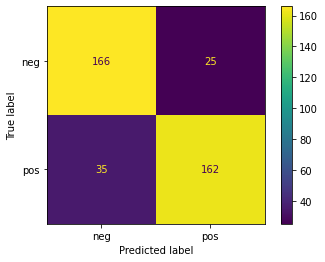

In [47]:
print("RF MODEL")
eval(rf, X_test_count)

# ADA BOOST

In [48]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
              precision    recall  f1-score   support

         neg       0.77      0.79      0.78       191
         pos       0.79      0.78      0.78       197

    accuracy                           0.78       388
   macro avg       0.78      0.78      0.78       388
weighted avg       0.78      0.78      0.78       388



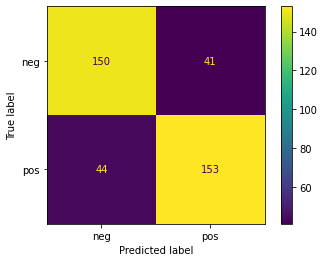

In [49]:
print("Ada MODEL")
eval(ada, X_test_count)

# TF-IDF

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [52]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04741363, 0.        ,
        0.        ]])

In [53]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,aaa,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaaahhhs,aahs,aaliyah,aaliyahs,aalyah,aalyahs,aamir,aardman,aaron,aatish,ab,aback,abandon,abandoned,abandoning,abandonment,abating,abba,abbe,abberation,...,zone,zoo,zookeeper,zookeepers,zoolander,zoolanders,zoologist,zoom,zooming,zoot,zophres,zorg,zorro,zsigmond,zucker,zuehlke,zuko,zukovsky,zulu,zurgs,zweibel,zwick,zwicks,zwigoffs,zycie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.237493,0.079164,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [54]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

NB MODEL
              precision    recall  f1-score   support

         neg       0.76      0.86      0.80       191
         pos       0.84      0.73      0.78       197

    accuracy                           0.79       388
   macro avg       0.80      0.79      0.79       388
weighted avg       0.80      0.79      0.79       388



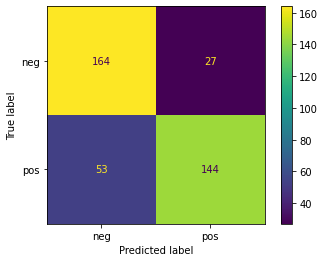

In [55]:
print("NB MODEL")
eval(nb, X_test_tf_idf)

# LOGISTIC REGRESSION

In [56]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(max_iter=1000)

LOG MODEL
              precision    recall  f1-score   support

         neg       0.79      0.86      0.82       191
         pos       0.85      0.78      0.81       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



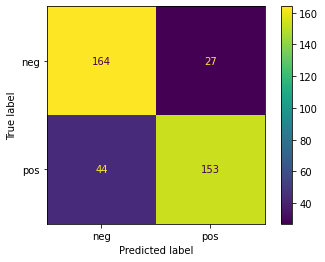

In [57]:
print("LOG MODEL")
eval(log, X_test_tf_idf)

In [58]:
log = LogisticRegression(max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
              precision    recall  f1-score   support

         neg       0.80      0.86      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



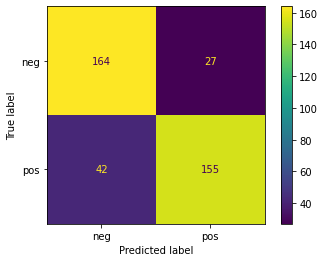

In [59]:
print("LOG MODEL BALANCED")
eval(log, X_test_tf_idf)

# SVM

In [60]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tf_idf,y_train)

LinearSVC()

SVC MODEL
              precision    recall  f1-score   support

         neg       0.81      0.87      0.84       191
         pos       0.86      0.80      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



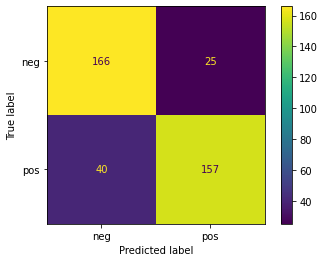

In [61]:
print("SVC MODEL")
eval(svc, X_test_tf_idf)

# KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier(n_neighbors=8)

KNN MODEL
              precision    recall  f1-score   support

         neg       0.67      0.74      0.70       191
         pos       0.72      0.64      0.68       197

    accuracy                           0.69       388
   macro avg       0.69      0.69      0.69       388
weighted avg       0.69      0.69      0.69       388



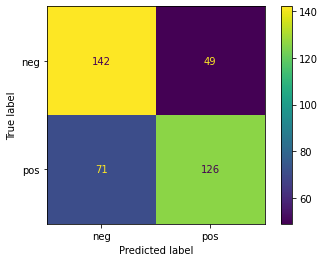

In [63]:
print("KNN MODEL")
eval(knn, X_test_tf_idf)

# RANDOM FOREST

In [64]:
rf = RandomForestClassifier(500, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

RF MODEL
              precision    recall  f1-score   support

         neg       0.77      0.90      0.83       191
         pos       0.88      0.74      0.80       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



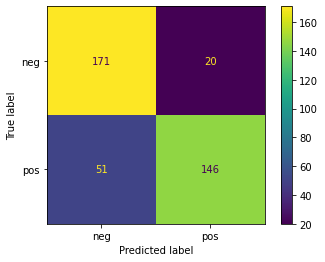

In [65]:
print("RF MODEL")
eval(rf, X_test_tf_idf)

In [66]:
rf = RandomForestClassifier(500, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500, n_jobs=-1,
                       random_state=42)

RF MODEL BALANCED
              precision    recall  f1-score   support

         neg       0.77      0.85      0.81       191
         pos       0.84      0.76      0.79       197

    accuracy                           0.80       388
   macro avg       0.80      0.80      0.80       388
weighted avg       0.80      0.80      0.80       388



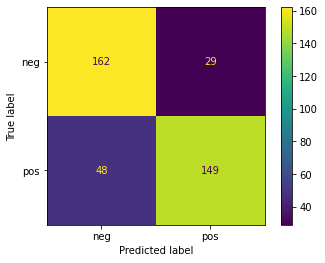

In [67]:
print("RF MODEL BALANCED")
eval(rf, X_test_tf_idf)

# ADA BOOST

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
              precision    recall  f1-score   support

         neg       0.80      0.86      0.83       191
         pos       0.86      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.83      0.83      0.82       388
weighted avg       0.83      0.82      0.82       388



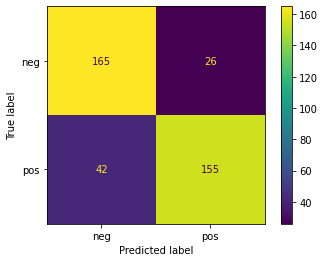

In [69]:
print("Ada MODEL")
eval(ada, X_test_tf_idf)

# For New Review, prediction with pipeline

In [70]:
from sklearn.pipeline import Pipeline

In [71]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression(max_iter=1000))])

In [83]:
pipe.fit(df["review"], df["label"])

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('log', LogisticRegression(max_iter=1000))])

In [94]:
review = "very good situation"
review = pd.Series(review).apply(cleaning)
pipe.predict(review)

array(['pos'], dtype=object)

In [95]:
review = "very bad situation"
review = pd.Series(review).apply(cleaning)
pipe.predict(review)

array(['neg'], dtype=object)